ECE 447: Linearization and Eigenvalues
===
What nonlinear systems look like locally.

Prof. Eric Klavins

&copy; 2019, University of Washington

In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math
%matplotlib inline

Scalar Systems
===

Start with a nonlinear system

$$
\dot x = f(x)
$$

where $x$ is a scalar function of t. Using the [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) we can expand $f$ near zero as follows:

$$
f(x) \approx f(0) + f'(0)\;x + \mathit{H.O.T.}
$$

Here, $f'(0)$ is the *linear* part and *H.O.T.* stands for *higher order terms*, which we don't care about right now (because we are linearizing).

**Example**: Suppose $f(x) = \sin(x)$. Then $f(0)=0$ and 

$$
f'(0) = \cos(0) = 1
$$

Thus, 

$$
\sin(x) \approx 0 + x + \mathit{H.O.T.}
$$

We can visualize this with a plot.

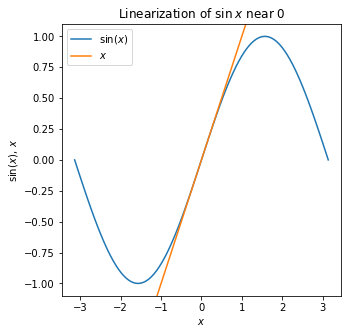

In [29]:
x = np.linspace(-np.pi,np.pi,100);
plt.plot(x,np.sin(x),label="$\sin(x)$")
plt.plot(x,x,label="$x$")
plt.xlabel('$x$')
plt.ylabel('$\sin(x), \; x$')
plt.title("Linearization of $\sin \; x$ near 0")
plt.ylim([-1.1, 1.1])
plt.legend();

Vector Valued Systems
===

Now suppose that $x \in \mathbb{R}^n$ is a vector and $f$ is a vector valued function. Then,

$$
f(x) = 0 + \left.\frac{\partial f}{\partial x}\right|_{x=0} + \mathit{H.O.T.}
$$

where the partial derivative of $f$ is defined by:

$$
\frac{\partial f}{\partial x} = \left(
\begin{array}{ccc}
  \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\
  \vdots &  \; & \vdots \\
  \frac{\partial f_n}{\partial x_1} & \dots & \frac{\partial f_n}{\partial x_n} 
\end{array}
\right )
$$

Evaluating the partial derivative at $x=0$ gives us the *Jacobian* matrix, which is in control systems is usually evaluated a $A$.

**Example: The Pendulum**: Suppose $g/l = b = 1$ in the pendulum model. Then

$$
\dot{\left (
\begin{array}{c} 
\theta \\ 
\omega
\end{array} \right )} = 
\left (
\begin{array}{c} 
\omega \\ 
\sin\theta-\omega
\end{array} \right )
$$

describes the nonlinear dynamics. To linearize the system around $\theta = 0$ and $\omega = 0$, we do

$$
\frac{\partial f}{\partial x} = \left.\left(
\begin{array}{cc}
  \frac{\partial \omega}{\partial \theta} & 
  \frac{\partial \omega}{\partial \omega} \\
  \frac{\partial (\sin \theta - \omega )}{\partial \theta} &
  \frac{\partial (\sin \theta - \omega )}{\partial \omega} 
\end{array}
\right )\right|_{\theta=0,\omega=0}
=
\left.\left(
\begin{array}{cc}
  0 & 1 \\
  \cos\theta & -1
\end{array}
\right )\right|_{\theta=0,\omega=0}
=
\left(
\begin{array}{cc}
  0 & 1 \\
  1 & -1
\end{array}
\right)
$$

So, near $0$ the system looks like

$$
\left (
\begin{array}{c} 
\dot\theta \\ 
\dot\omega
\end{array} \right )
\approx
\left(
\begin{array}{cc}
  0 & 1 \\
  1 & -1
\end{array}
\right)
\left (
\begin{array}{c} 
\theta \\ 
\omega
\end{array} \right )
=
\left (
\begin{array}{c} 
\omega \\ 
\theta - \omega
\end{array} \right )
$$

We can visualize this vector field with `quiver`.

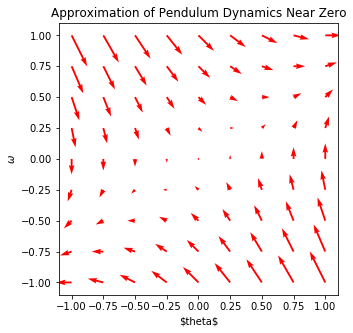

In [61]:
theta = np.linspace(-1, 1, 9)
omega = np.linspace(-1, 1, 9)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = Theta - Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('\\$theta$')
plt.ylabel('$\omega$')
plt.title("Approximation of Pendulum Dynamics Near Zero");

We will not show it mathematically, but is a beautiful theorem in mathematics that for any $\varepsilon$, there exists a $\delta$ such that if $|x| < \delta$ then the difference between $f$ and its linearization is less than $\varepsilon$. 

Said differently, the linearization approximates $f$ *locally*.

Changes of Coordinates
===

At other equilibrium points it is convenient to change coordinates, so that we are always examining the point zero. To do this:

- Say $x^*$ is an equilibrium point.
- Define $x_e = x - x^*$. 

Then,

$$
\dot x_e = \dot x = f(x) = f(x_e+x^*)
$$

So we now have an equation for the change of $x_e$ in terms of $x_e$ itself, and the constant $x^*$.

**Example**: For example, lets look at the behavior of the pendulum model at $(\theta,\omega) = (\pi,0)$. In this case, we linearize the function

$$
f \left (
\begin{array}{c} 
\theta_e + \pi \\ 
\omega_e + 0
\end{array} \right ) = 
\left (
\begin{array}{c} 
\omega_e \\ 
\sin(\theta_e+\pi)-\omega_e
\end{array} \right )
$$

The $A$ matrix is then

\begin{align}
\frac{\partial f}{\partial x} & = \left.\left(
\begin{array}{cc}
  \frac{\partial \omega_e}{\partial \theta_e} & 
  \frac{\partial \omega_e}{\partial \omega_e} \\
  \frac{\partial \sin (\theta_e+\pi) - \omega_e}{\partial \theta_e} &
  \frac{\partial \sin (\theta_e+\pi) - \omega_e}{\partial \omega_e} 
\end{array}
\right )\right|_{\theta_e=0,\omega_e=0} \\
& =
\left.\left(
\begin{array}{cc}
  0 & 1 \\
  \cos(\theta_e+\pi) & -1
\end{array}
\right )\right|_{\theta_e=0,\omega_e=0} \\
& =
\left(
\begin{array}{cc}
  0 & 1 \\
  -1 & -1
\end{array}
\right).
\end{align}

So, near $0$ *in the new coordinate system*, the system looks like

\begin{align}
\left (
\begin{array}{c} 
\dot\theta_e \\ 
\dot\omega_e
\end{array} \right )
& \approx
\left(
\begin{array}{cc}
  0 & 1 \\
  -1 & -1
\end{array}
\right)
\left (
\begin{array}{c} 
\theta_e \\ 
\omega_e
\end{array} \right ) \\
& =
\left (
\begin{array}{c} 
\omega_e \\ 
-\theta_e - \omega_e
\end{array} \right ).
\end{align}

We can visualize this vector field with `quiver` as well.

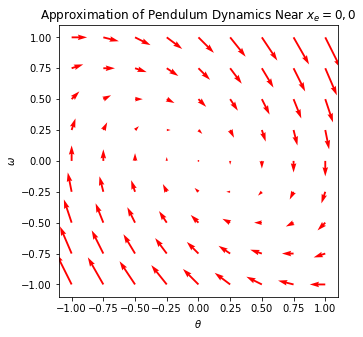

In [63]:
theta = np.linspace(-1, 1, 9)
omega = np.linspace(-1, 1, 9)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = -Theta - Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('$\\theta$')
plt.ylabel('$\omega$')
plt.title("Approximation of Pendulum Dynamics Near $x_e=0,0$");

Linear Systems and Eigenvalues
===

Note that once you linearize a system, you end up with $f(x) = Ax$ for some matrix $A \in \mathbb{R}^{n\times n}$. The dynamics of a linear system are thus

$$
\dot x = A x
$$

Here, we will try to characterize *everything* that could happen with two dimensional systems, that is, with $x \in \mathbb{R}^{2 \times 2}$. It turns out that the *eigenvalues* of $A$ tell us almost everything. Note that eigenvalues are also referred to as *poles$.

Recall that an eigenvalue is a solution to the equation

$$
A x = \lambda x
$$

where $\lambda$ is the *eigenvalue* and $x$ is a non-zero *eigenvector*. This can be written

$$
A x = \lambda I x
$$

or

$$
(\lambda I - A)x = 0
$$

which implies that the

$$
\mathrm{det}(\lambda I - A) = 0.
$$

Therefore, to find the eigenvalues of $A$, we have to solve the above equation for $\lambda$. 

**Example:** Suppose
$$
A = \left(\begin{array}{cc}
0 & 1 \\
1 & -1
\end{array}\right)
$$

then

\begin{align}
\mathrm{det}(\lambda I - A) 
& = \left|
\left(\begin{array}{cc}
\lambda & 0 \\
0 & \lambda
\end{array}\right) -
\left(\begin{array}{cc}
0 & 1 \\
1 & -1
\end{array}\right)
\right| \\
& =\left|
\begin{array}{cc}
\lambda & -1 \\
-1 & \lambda+1
\end{array}
\right| \\
& =
\lambda(\lambda+1)-1 \\
& = 
\lambda^2 + \lambda-1
\end{align}

Hence, 

$$
\lambda = \frac{-1\pm\sqrt{5}}{2}.
$$

or $-1.62$ and $0.62$. 

The eigenvectors of a system can be found with

$$
A x = \lambda x
$$

In this case, we have

$$
\begin{pmatrix}0&1\\1&-1\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} = 
\lambda
\begin{pmatrix}x_1\\x_2\end{pmatrix}
$$

Which amounts to $x_1 = \lambda x_1$ and $x_1 - x_2 = \lambda x_2$. Choosing $x_1 = 1$ we use the first equation to get $x_2 = \lambda$. 

So the first eigenvector can be chosen to be

$$
{\bf x}_1 = \begin{pmatrix}1\\\frac{-1-\sqrt{5}}{2}\end{pmatrix} \approx 
\begin{pmatrix}1\\-1.62\end{pmatrix}
$$

And similarly, the second can be chosen to be
$$
{\bf x}_2 = \begin{pmatrix}1\\\frac{-1+\sqrt{5}}{2}\end{pmatrix} \approx 
\begin{pmatrix}1\\0.62\end{pmatrix}.
$$

Knowing the *eigenstructure* of a system makes it easy to draw a cartoon of the phase vector field if the eigenvalues are real. This is because for an eigenvector x, $\dot x$ is just a scaled value of $x$: 

$$
\dot x = \lambda x.
$$

**Example:** Draw the vector field for $\dot x = A x$ when 
$$
A =\begin{pmatrix}0&1\\1&-1\end{pmatrix}.
$$

- First draw eigenvector subspaces. This means drawing $\lambda x$ where $x$ is an eigenvector for all $\lambda \in \mathbb{R}$. 
- Second, draw $\dot x$ on the subspaces.
- Fill in the rest.

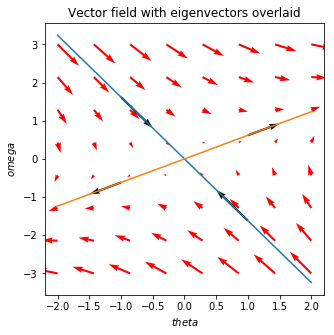

In [159]:
q=np.linspace(-2,2,10)
a=(-1-np.sqrt(5))/2
b=(-1+np.sqrt(5))/2

theta = np.linspace(-2, 2, 8)
omega = np.linspace(-3, 3, 8)
Theta,Omega = np.meshgrid(theta,omega)
u = Omega
v = Theta - Omega
plt.rcParams['figure.figsize'] = [5,5]
plt.quiver(Theta, Omega, u, v, color='r',angles='xy',scale_units='xy')

plt.plot(q,a*q)
plt.plot(q,b*q)
plt.quiver([1,-1,1,-1],[a,-a,b,-b],[-1,1,1,-1],[-a,a,b,-b],
           scale=2,angles='xy',scale_units='xy');

plt.xlabel('$theta$')
plt.ylabel('$omega$')
plt.title("Vector field with eigenvectors overlaid");

Computing Eigenvalues Symbolically
===

Python can do symbolic math using the [SymPy](https://docs.sympy.org/latest/tutorial/index.html) library. For example, to get the eigenvalues of $A$ we do:

In [174]:
from sympy import *

A = Matrix([[0, 1], [1,-1]])
lam1,lam2=A.eigenvals()
lam1,lam2

(-sqrt(5)/2 - 1/2, -1/2 + sqrt(5)/2)

Note that `lam1` and `lam2` are *symbolic expressions*. To get numerical values from them, use the `N` method.

In [177]:
N(lam1),N(lam2)

(-1.61803398874989, 0.618033988749895)

You can also get the eigenvectors. The method provided returns a list of tuples of the form

    (eigenvalue:algebraic multiplicity, [eigenvectors]).

In [169]:
A.eigenvects()

[(-1/2 + sqrt(5)/2, 1, [Matrix([
   [-1/(-sqrt(5)/2 + 1/2)],
   [                    1]])]), (-sqrt(5)/2 - 1/2, 1, [Matrix([
   [-1/(1/2 + sqrt(5)/2)],
   [                   1]])])]

A somewhat easier way to see the eigenvalues is to us *diagonalization*, which puts the eigenvectors as the columns of a matrix:

In [185]:
P, D = A.diagonalize()
P

Matrix([
[-2/(-sqrt(5) + 1), -2/(1 + sqrt(5))],
[                1,                1]])

We can pick off the eigenvectors from `P` using the `row` and `col` operators on matricies.

In [201]:
x1=P.col(0)
x2=P.col(1)

Notice that SymPy is also includes imaginary numbers. So you can get the eigenvalues of the more interesting spiral matrix from the pendulum example too

In [205]:
A = Matrix([[0, 1], [-1,-1]])
lam1,lam2=A.eigenvals()
lam1,lam2

(-1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2)

In [217]:
print(re(lam1))
print(im(lam1))
print(abs(lam1))
print(conjugate(lam1))

-1/2
-sqrt(3)/2
1
-1/2 + sqrt(3)*I/2


We will explore the use of SymPy gradually throughout the quarter. For now, you might consider following the above link and reading about how it works.